##**Detección de Vehículos en Tráfico Urbano con YOLOv8**

#1. Introduccion


El problema abordado en este proyecto es la **detección de vehículos en escenarios de tráfico urbano**
utilizando técnicas de visión artificial.

La detección automática de vehículos es un componente clave en aplicaciones como:
- Gestión inteligente del tráfico
- Análisis de congestión vehicular
- Sistemas de seguridad vial
- Smart cities y monitoreo urbano

El desarrollo de este tipo de soluciones permite automatizar procesos que tradicionalmente
requieren supervisión humana, mejorando la eficiencia, reduciendo costos y permitiendo
análisis en tiempo real a partir de video o imágenes.

#2. Instalación de Dependencias

In [19]:
!pip install -q ultralytics kagglehub opencv-python matplotlib

#3. Descarga del dataset

## Datos

El dataset utilizado fue obtenido desde la plataforma **Kaggle**, específicamente del conjunto
**Traffic Detection Project**.

Características principales del dataset:
- Tipo de datos: imágenes
- Dominio: tráfico vehicular en entornos urbanos
- Clases: 'bicycle', 'bus', 'car', 'motorbike', 'person'
- Resolución aproximada: 640x640 píxeles
- Estructura:
  - Train: imágenes para entrenamiento
  - Validation: imágenes para validación
  - Test: imágenes para prueba

El dataset se encuentra etiquetado en formato compatible con YOLO, lo que facilita su uso
para entrenamiento supervisado.

In [20]:
import kagglehub
import os

dataset_path = kagglehub.dataset_download(
    "yusufberksardoan/traffic-detection-project"
)

print("Dataset descargado en:", dataset_path)
os.listdir(dataset_path)

Dataset descargado en: /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1


['train',
 'test',
 'data.yaml',
 'valid',
 'README.roboflow.txt',
 'README.dataset.txt']

# 4.Exploración de datos

Cantidad de imágenes

In [21]:
#Validación previa del dataset para ver las cantidades
def count_images(folder):
    return len(os.listdir(folder))

print("Train:", count_images(f"{dataset_path}/train/images"))
print("Valid:", count_images(f"{dataset_path}/valid/images"))
print("Test :", count_images(f"{dataset_path}/test/images"))

Train: 5805
Valid: 549
Test : 279


Visualización de ejemplos

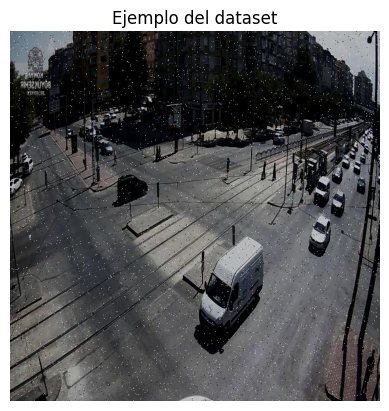

In [22]:
import cv2
import matplotlib.pyplot as plt
import random

img_dir = f"{dataset_path}/train/images"
img_name = random.choice(os.listdir(img_dir))
img = cv2.imread(f"{img_dir}/{img_name}")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.title("Ejemplo del dataset")
plt.show()

Revisión del data.yaml

In [23]:
!cat {dataset_path}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 5
names: ['bicycle', 'bus', 'car', 'motorbike', 'person']

roboflow:
  workspace: fsmvu
  project: street-view-gdogo
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/fsmvu/street-view-gdogo/dataset/1

#5. Entrenamiento con Transfer Learning (YOLOv8)

Para resolver el problema de detección de vehículos se utilizó el modelo **YOLOv8**,
una arquitectura de deep learning para detección de objetos en tiempo real, aprovechando características previamente aprendidas
como bordes, formas y patrones visuales

YOLO (You Only Look Once) es una arquitectura de tipo **one-stage detector**, lo que
significa que realiza la detección y clasificación de objetos en una sola pasada de la red.

### Características de YOLOv8:
- Backbone: red convolucional para extracción de características
- Neck: fusión de características multi-escala
- Head: predicción de bounding boxes, clases y probabilidades

### Entrada y salida:
- Entrada: imágenes RGB de tamaño 640x640
- Salida:
  - Coordenadas de bounding boxes
  - Clase detectada
  - Confianza de detección

En este proyecto se utilizó **transfer learning**, partiendo de pesos preentrenados
(`yolov8n.pt`) y ajustándolos al dominio del tráfico vehicular.

In [24]:
from ultralytics import YOLO

#Elegimos la versión nano por su menor costo computacional y porque es adecuada para pruebas académicas y entrenamiento rápido
model = YOLO("yolov8n.pt")  # modelo preentrenado

model.train(
    data=f"{dataset_path}/data.yaml",
    epochs=10, # Cada época significa que el modelo ve todo el dataset una vez
    imgsz=640,
    batch=16,
    project="traffic_project",
    name="yolov8_traffic"
)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8_traffic2, nbs=64, nms=False, opset=None, o

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78cbb4f148f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

#6. Evaluación del modelo

El modelo fue evaluado utilizando métricas estándar para detección de objetos:

- Precision
- Recall
- mAP (mean Average Precision)

Los resultados obtenidos muestran un desempeño adecuado del modelo en la detección
de vehículos. Un valor alto de precision indica pocas falsas detecciones, mientras que
el recall refleja la capacidad del modelo para detectar la mayoría de los vehículos presentes.

Las posibles causas de errores incluyen:
- Oclusión parcial de vehículos
- Iluminación variable
- Escenarios con alta densidad vehicular

In [25]:

#Evaluamos el modelo usando métricas estándar de detección de objetos como Precision, Recall y mAP, que nos permiten medir qué tan bien localiza y clasifica los vehículos.
metrics = model.val()
print(metrics)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 73 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1638.2±1016.0 MB/s, size: 73.8 KB)
val: Scanning /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/valid/labels.cache... 549 images, 8 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 549/549 191.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 35/35 4.1it/s 8.5s
                   all        549       6270      0.891      0.823      0.895       0.64
               bicycle        189        250      0.918      0.844      0.898      0.676
                   bus         81        108      0.938      0.907      0.956      0.816
                   car        520       3842      0.891      0.926      0.957      0.735
             motorbike        331       1238      0.899      0.776  

# 7.Inferencia

In [26]:
model.predict(
    source=f"{dataset_path}/test/images",
    conf=0.4,
    save=True
)


image 1/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 16 cars, 1 motorbike, 1 person, 7.3ms
image 2/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 3 motorbikes, 7.3ms
image 3/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 14 cars, 1 motorbike, 7.3ms
image 4/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 3 motorbikes, 7.3ms
image 5/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/agu

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'bicycle', 1: 'bus', 2: 'car', 3: 'motorbike', 4: 'person'}
 obb: None
 orig_img: array([[[ 92,  81,  77],
         [104,  93,  89],
         [105,  93,  89],
         ...,
         [180, 138, 133],
         [186, 141, 137],
         [188, 143, 139]],
 
        [[ 94,  83,  79],
         [105,  94,  90],
         [104,  92,  88],
         ...,
         [175, 133, 128],
         [177, 135, 130],
         [180, 135, 131]],
 
        [[ 96,  85,  81],
         [104,  93,  89],
         [103,  91,  87],
         ...,
         [179, 139, 134],
         [176, 134, 129],
         [174, 132, 127]],
 
        ...,
 
        [[ 68,  83,  92],
         [ 77,  92, 101],
         [ 89, 104, 113],
         ...,
         [ 96, 112, 119],
         [ 95, 111, 118],
         [ 93, 109, 116]],
 
        [[ 65,  80,  89],
         [ 74,  89,  98],
        

#8. Conteo de vehículos

In [27]:
results = model.predict(
    source=f"{dataset_path}/test/images",
    conf=0.4
)

for r in results:
    print("Vehículos detectados:", len(r.boxes))


image 1/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 16 cars, 1 motorbike, 1 person, 7.4ms
image 2/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 3 motorbikes, 7.3ms
image 3/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 14 cars, 1 motorbike, 7.3ms
image 4/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 3 motorbikes, 7.3ms
image 5/279 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/agu

#9. Identificacion de Vehiculos

Identificacion por un tipo


image 1/1 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/duque_de_caxias-115_png_jpg.rf.275fbdccb6a6ca848ac3cf3ae771946e.jpg: 640x640 1 bus, 12 cars, 10 motorbikes, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

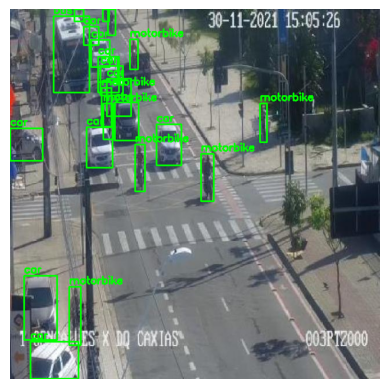

In [31]:
import cv2, matplotlib.pyplot as plt, os, random
names = ['bicycle','bus','car','motorbike','person']
img_path = f"{dataset_path}/test/images/" + random.choice(os.listdir(f"{dataset_path}/test/images"))
r = model.predict(img_path)[0]
img = r.orig_img.copy()
for b in r.boxes:
    x1,y1,x2,y2 = map(int,b.xyxy[0])
    cls = int(b.cls[0])
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.putText(img,names[cls],(x1,y1-5),cv2.FONT_HERSHEY_SIMPLEX,0.6,(0,255,0),2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)); plt.axis('off')

Identificacion Avanzada de tipos


image 1/1 /root/.cache/kagglehub/datasets/yusufberksardoan/traffic-detection-project/versions/1/test/images/aguanambi-2995_png_jpg.rf.2fa2f60b9d1c1250287a03624c83817b.jpg: 640x640 11 cars, 3 motorbikes, 7.4ms
Speed: 2.0ms preprocess, 7.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


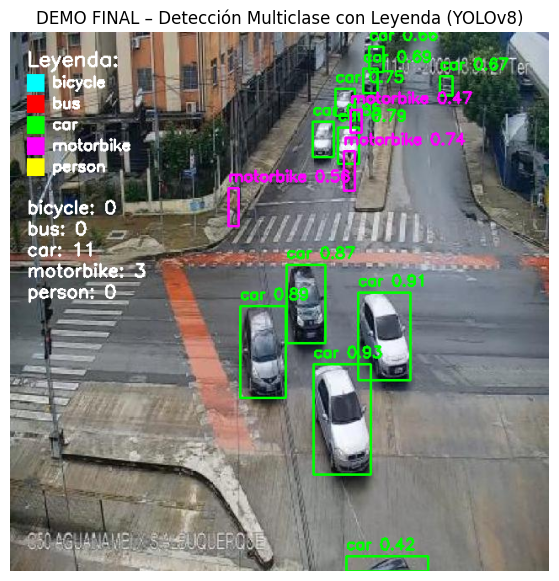

In [32]:
import cv2
import matplotlib.pyplot as plt
import random
import os

# Clases y colores (BGR)
class_names = ['bicycle', 'bus', 'car', 'motorbike', 'person']
class_colors = {
    0: (255, 255, 0),   # bicycle - cyan
    1: (0, 0, 255),     # bus - azul
    2: (0, 255, 0),     # car - verde
    3: (255, 0, 255),   # motorbike - magenta
    4: (0, 255, 255)    # person - amarillo
}

# Imagen aleatoria del test
test_img_dir = f"{dataset_path}/test/images"
img_name = random.choice(os.listdir(test_img_dir))
img_path = f"{test_img_dir}/{img_name}"

# Inferencia
results = model.predict(
    source=img_path,
    conf=0.4,
    save=False
)

r = results[0]
img = r.orig_img.copy()

# Conteo por clase
counts = {name: 0 for name in class_names}

# Dibujar bounding boxes
for box in r.boxes:
    cls_id = int(box.cls[0])
    conf = float(box.conf[0])
    x1, y1, x2, y2 = map(int, box.xyxy[0])

    label = class_names[cls_id]
    color = class_colors.get(cls_id, (255, 255, 255))
    counts[label] += 1

    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
    cv2.putText(
        img,
        f"{label} {conf:.2f}",
        (x1, y1 - 8),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        color,
        2
    )


legend_x = 20
legend_y = 40
legend_h = 25

cv2.putText(
    img,
    "Leyenda:",
    (legend_x, legend_y),
    cv2.FONT_HERSHEY_SIMPLEX,
    0.8,
    (255, 255, 255),
    2
)

for i, name in enumerate(class_names):
    y = legend_y + (i + 1) * legend_h
    color = class_colors[i]

    cv2.rectangle(
        img,
        (legend_x, y - 15),
        (legend_x + 20, y + 5),
        color,
        -1
    )
    cv2.putText(
        img,
        name,
        (legend_x + 30, y),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (255, 255, 255),
        2
    )

# === Conteo por clase (debajo de la leyenda) ===
y_offset = legend_y + (len(class_names) + 2) * legend_h
for cls, count in counts.items():
    cv2.putText(
        img,
        f"{cls}: {count}",
        (legend_x, y_offset),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (255, 255, 255),
        2
    )
    y_offset += 25

# Convertir BGR → RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar imagen final
plt.figure(figsize=(12, 7))
plt.imshow(img)
plt.axis("off")
plt.title("DEMO FINAL – Detección Multiclase con Leyenda (YOLOv8)")
plt.show()

#10. Conclusiones

- Se logró implementar exitosamente un sistema de detección vehicular usando YOLOv8.
- El uso de transfer learning permitió reducir el tiempo de entrenamiento manteniendo
  un buen desempeño.
- El modelo demuestra ser una solución viable para aplicaciones de tráfico en tiempo real.
- Como trabajo futuro, se podría mejorar el modelo usando más datos o arquitecturas más grandes.